<a href="https://colab.research.google.com/github/mkrahiman/sit742/blob/master/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT744 Assignment 2: Efficient Training of Convolutional Neural Network 

<div class="alert-info">
    <p>Due: <strong>9:00am 18 May 2020</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>40%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynp </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter  practical issues that help you consolidate textbook learning. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks

*(weight ~20%)*

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In Assignment 2, you will apply the best practices of deep-learning computer vision to improve the image classification performance.

In [0]:
#import statements
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import plot_model
from datetime import datetime

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 1.1 Revisit Fashion-MNIST classification with DNN



In [0]:
###Importing the fashion_mnsit from the keras dataset:
import keras.datasets.fashion_mnist as fashion_mnist
###Getting the training and testing data from the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
##The class names are defined so saving them under the classnames:
classnames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###Pipeline:

###Reshape the data:
(train_images, val_images) = train_images[5000:], train_images[:5000] 
(train_labels, val_labels) = train_labels[5000:], train_labels[:5000]

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
val_images = val_images.astype('float32') / 255

### Reshape input data from (28, 28) to (28 * 28):
train_images = train_images.reshape(train_images.shape[0], 28 * 28)
val_images = val_images.reshape(val_images.shape[0], 28 * 28)
test_images = test_images.reshape(test_images.shape[0], 28 * 28)


train_labels=to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels=to_categorical(test_labels)

Dataset_train = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
Dataset_train

Dataset_test = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
Dataset_test

Dataset_val = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
Dataset_val

Dataset_train = Dataset_train.shuffle(55000).batch(64)
Dataset_test = Dataset_test.batch(64)
Dataset_val = Dataset_val.batch(64)
###Building a sequential network:
Model_1 = models.Sequential([
    layers.Dense(512, activation='relu', 
    input_shape=(28 * 28, )),
    layers.Dense(10, activation='sigmoid')])

Model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
            
Fitting_model_train = Model_1.fit(Dataset_train,
                                  epochs=10,
                                  validation_data = (Dataset_val))

testing_model_1 = Model_1.evaluate(Dataset_test, verbose= 0)


Epoch 1/10
860/860 [==============================] - 3s 3ms/step - loss: 0.5159 - accuracy: 0.8187 - val_loss: 0.3878 - val_accuracy: 0.8670
Epoch 2/10
860/860 [==============================] - 3s 3ms/step - loss: 0.3748 - accuracy: 0.8658 - val_loss: 0.3398 - val_accuracy: 0.8766
Epoch 3/10
860/860 [==============================] - 3s 3ms/step - loss: 0.3367 - accuracy: 0.8779 - val_loss: 0.3365 - val_accuracy: 0.8760
Epoch 4/10
860/860 [==============================] - 3s 3ms/step - loss: 0.3135 - accuracy: 0.8838 - val_loss: 0.3095 - val_accuracy: 0.8888
Epoch 5/10
860/860 [==============================] - 3s 3ms/step - loss: 0.2896 - accuracy: 0.8936 - val_loss: 0.3186 - val_accuracy: 0.8846
Epoch 6/10
860/860 [==============================] - 3s 3ms/step - loss: 0.2720 - accuracy: 0.8989 - val_loss: 0.3061 - val_accuracy: 0.8904
Epoch 7/10
860/860 [==============================] - 3s 3ms/step - loss: 0.2622 - accuracy: 0.9025 - val_loss: 0.3039 - val_accuracy: 0.8928
Epoch 

In [0]:
testing_model_1[1]

0.8845000267028809

## Task 1.2 Train a ConvNet from scratch




In [0]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

###Importing the fashion_mnsit from the keras dataset:
import keras.datasets.fashion_mnist as fashion_mnist
###Getting the training and testing data from the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
##The class names are defined so saving them under the classnames:
classnames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###Pipeline:
(train_images, val_images) = train_images[5000:], train_images[:5000] 
(train_labels, val_labels) = train_labels[5000:], train_labels[:5000]

Train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
Val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)
Test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

Train_images = Train_images.astype('float32') / 255
Test_images = Test_images.astype('float32') / 255
Val_images = Val_images.astype('float32') / 255

Train_labels=to_categorical(train_labels, num_classes= 10)
Val_labels = to_categorical(val_labels, num_classes= 10)
Test_labels=to_categorical(test_labels, num_classes= 10)
IMAGE_SIZE = 28




In [0]:
### Model
from keras.layers.normalization import BatchNormalization

### Add convolution 2D
def make_model():
  Seq = models.Sequential()
  Seq.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
  Seq.add(layers.MaxPooling2D((2, 2)))

  Seq.add(layers.Conv2D(64, (3, 3), activation='relu'))
  Seq.add(layers.MaxPooling2D((2, 2)))

  Seq.add(layers.Conv2D(128, (3, 3), activation='relu'))
  Seq.add(layers.Flatten())
  
  Seq.add(layers.Dense(128, activation='relu'))
  Seq.add(layers.Dense(10, activation='sigmoid'))
  Seq.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  return Seq
#optimizers.RMSprop(lr=1e-4)

In [0]:
Conv_model = make_model()
Conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [0]:
Fitting_model = Conv_model.fit(
    Train_images, Train_labels,
    batch_size = 64,
    steps_per_epoch = 100,
    epochs=10,
    verbose = 1,
    validation_data= (Val_images, Val_labels),
    validation_batch_size = 64,
    validation_steps = 50
    )


Epoch 1/10
100/100 [==============================] - 1s 7ms/step - loss: 0.2503 - accuracy: 0.4663 - val_loss: 0.1434 - val_accuracy: 0.7100
Epoch 2/10
100/100 [==============================] - 1s 6ms/step - loss: 0.1231 - accuracy: 0.7412 - val_loss: 0.1082 - val_accuracy: 0.7800
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: 0.1022 - accuracy: 0.7830 - val_loss: 0.0972 - val_accuracy: 0.8084
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0932 - accuracy: 0.8048 - val_loss: 0.0937 - val_accuracy: 0.8106
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0877 - accuracy: 0.8197 - val_loss: 0.0813 - val_accuracy: 0.8356
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0836 - accuracy: 0.8313 - val_loss: 0.0768 - val_accuracy: 0.8478
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0801 - accuracy: 0.8372 - val_loss: 0.0745 - val_accuracy: 0.8481
Epoch 

In [0]:
%pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-5gx6g2u7
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-5gx6g2u7
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.03082041fb5ef2b29217584659bc43d89602d57cf_-cp36-none-any.whl size=101669 sha256=75c725cdd7615f393fc1ba1bc077810c65315ab522c035781facb73681d4a28b
  Stored in directory: /tmp/pip-ephem-wheel-cache-zs_npwz8/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


(0.0, 1.0)

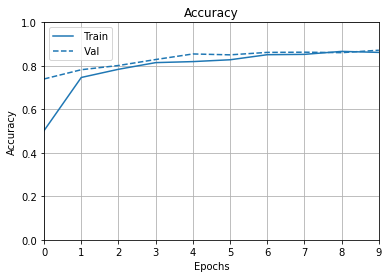

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

plotter = tfdocs.plots.HistoryPlotter()
plotter.plot({"": Fitting_model}, metric = "accuracy")
plt.title("Accuracy")
plt.ylim([0,1])


(0.0, 1.0)

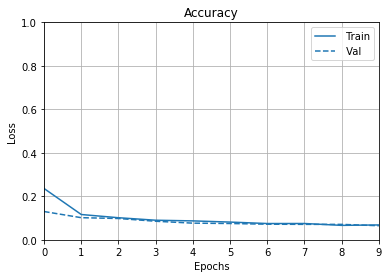

In [0]:
plotter = tfdocs.plots.HistoryPlotter()
plotter.plot({"": Fitting_model}, metric = "loss")
plt.title("Accuracy")
plt.ylim([0,1])

In [0]:
Testing_model = Conv_model.evaluate(Test_images,
               Test_labels,
               batch_size = 64)
Testing_model[1]

#Testing_model = Model_1.evaluate(Dataset_Test, verbose= 0)

#Testing_model[1]

157/157 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.8610


0.8610000014305115


### Task 1.3 Build an input pipeline for data augmentation

*(weight ~5%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range=8, 
                         width_shift_range=0.08, 
                         shear_range=0.3,
                         height_shift_range=0.08, 
                         zoom_range=0.08)

test_gen = ImageDataGenerator()


In [0]:
train_generator = gen.flow(Train_images, Train_labels, batch_size=64)
test_generator = test_gen.flow(Test_images, Test_labels, batch_size = 64)
val_generator = gen.flow(Val_images, Val_labels, batch_size=64)

In [0]:
Augmented_model = Conv_model.fit(train_generator, 
                            steps_per_epoch = 100, 
                            epochs= 10, 
                            validation_data = val_generator, 
                            validation_steps = 50)

Epoch 1/10
100/100 [==============================] - 4s 37ms/step - loss: 0.1006 - accuracy: 0.7858 - val_loss: 0.0981 - val_accuracy: 0.7937
Epoch 2/10
100/100 [==============================] - 4s 36ms/step - loss: 0.0972 - accuracy: 0.7958 - val_loss: 0.0881 - val_accuracy: 0.8081
Epoch 3/10
100/100 [==============================] - 4s 36ms/step - loss: 0.0904 - accuracy: 0.8105 - val_loss: 0.0879 - val_accuracy: 0.8159
Epoch 4/10
100/100 [==============================] - 4s 37ms/step - loss: 0.0854 - accuracy: 0.8222 - val_loss: 0.0831 - val_accuracy: 0.8263
Epoch 5/10
100/100 [==============================] - 4s 37ms/step - loss: 0.0843 - accuracy: 0.8223 - val_loss: 0.0791 - val_accuracy: 0.8394
Epoch 6/10
100/100 [==============================] - 4s 37ms/step - loss: 0.0841 - accuracy: 0.8204 - val_loss: 0.0806 - val_accuracy: 0.8228
Epoch 7/10
100/100 [==============================] - 4s 37ms/step - loss: 0.0802 - accuracy: 0.8241 - val_loss: 0.0779 - val_accuracy: 0.8350

In [0]:
Testing_augmented_model = Conv_model.evaluate(Test_images, Test_labels, batch_size= 64, verbose = 1)
Testing_augmented_model[1]

157/157 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.8656


0.8655999898910522

(0.0, 1.0)

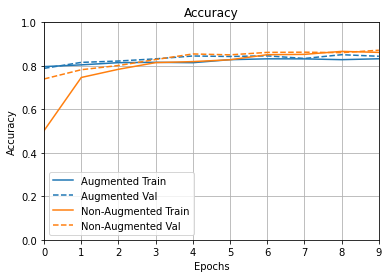

In [0]:
plotter = tfdocs.plots.HistoryPlotter()
plotter.plot({ "Augmented": Augmented_model, "Non-Augmented": Fitting_model}, metric = "accuracy")
plt.title("Accuracy")
plt.ylim([0,1])

(0.0, 1.0)

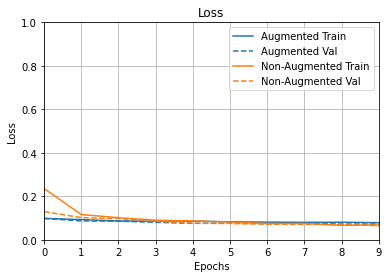

In [0]:
plotter = tfdocs.plots.HistoryPlotter()
plotter.plot({ "Augmented": Augmented_model, "Non-Augmented": Fitting_model}, metric = "loss")
plt.title("Loss")
plt.ylim([0,1])

### Task 1.3 Fashion-MNIST with transfer learning

*(weight ~5%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



In [0]:
#from _future_ import absolute_import, division, print_function

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input # New
from keras.models import Model as models
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [0]:
base_model = InceptionV3(weights='imagenet', 
                         include_top=False, 
                         input_shape=(75, 75, 3))
Incp_model = base_model.output
Incp_model = GlobalAveragePooling2D()(Incp_model)
Incp_model = Dense(512, activation='relu')(Incp_model)
predictions = Dense(10, activation='softmax')(Incp_model)

model = models(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

In [0]:
###Importing the fashion_mnsit from the keras dataset:
import keras.datasets.fashion_mnist as fashion_mnist
###Getting the training and testing data from the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
##The class names are defined so saving them under the classnames:
classnames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshaping the images to fit the model requirments:
from skimage.transform import resize
train_images_preprocess = np.zeros((train_images.shape[0], 75, 75, 3), dtype=np.float32)

for i, img in enumerate(train_images):
    img_resize = resize(img, (75, 75), anti_aliasing=True)
    img_resize = preprocess_input(img_resize).astype(np.float32)
    train_images_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])

del train_images

test_images_preprocess = np.zeros((test_images.shape[0], 75, 75, 3), dtype=np.float32)

for i, img in enumerate(test_images):
    img_resize = resize(img, (75, 75), anti_aliasing=True)
    img_resize = preprocess_input(img_resize).astype(np.float32)
    test_images_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])

del test_images



In [0]:
# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train it
model.fit(train_images_preprocess, train_labels, epochs=15)



Epoch 1/15
60000/60000 [==============================] - 48s 794us/step - loss: 1.2341 - accuracy: 0.5766
Epoch 2/15
60000/60000 [==============================] - 45s 754us/step - loss: 1.0662 - accuracy: 0.6325
Epoch 3/15
60000/60000 [==============================] - 45s 754us/step - loss: 1.0100 - accuracy: 0.6503
Epoch 4/15
60000/60000 [==============================] - 45s 754us/step - loss: 0.9714 - accuracy: 0.6607
Epoch 5/15
60000/60000 [==============================] - 45s 756us/step - loss: 0.9471 - accuracy: 0.6687
Epoch 6/15
60000/60000 [==============================] - 45s 756us/step - loss: 0.9250 - accuracy: 0.6753
Epoch 7/15
60000/60000 [==============================] - 46s 759us/step - loss: 0.9122 - accuracy: 0.6807
Epoch 8/15
60000/60000 [==============================] - 46s 760us/step - loss: 0.9015 - accuracy: 0.6848
Epoch 9/15
60000/60000 [==============================] - 45s 758us/step - loss: 0.8887 - accuracy: 0.6902
Epoch 10/15
60000/60000 [============

In [0]:
test_loss, test_acc = model.evaluate(test_images_preprocess, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.10000000149011612


### Task 1.4 Performance comparison

*(weight ~2%)*

Record the test accuracy achieved at different training configurations above. Which method achieved the highest accuracy? Why did it work better for this problem?


```

1. From the Task 1.1 with DNN we achieved an accuracy of 88% approximately.

2. From the task 1.2 with augmentation we received an accuracy of 88% approximately.

3. From the task 1.3 with transfer learning we achieved an accuracy of 10%

From all the above we achieved the best accuracy of 88% in task 1.2. The reason 
for this is that data augmentation reduces the risk overfitting (which is very evidently seen in a normal Conv net).

```



## Task 2 Fast training of deep networks

*(weight ~20%)*

### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~7%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.




#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

In [101]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10406393337229639281, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7358482500044055732
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13502889864864485422
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1065190060557356230
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [99]:
!cat /proc/cpuinfo
!cat /proc/meminfo.

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa itlb_multihit
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits 

In [108]:
!pip install GPUtil

  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=af47e49fe3999b064b5c243eccf005eb33eebf7583dd40b75d233730e3fb7e11
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil


In [109]:
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()

Gen RAM Free: 17.1 GB  | Proc size: 18.6 GB
GPU RAM Free: 755MB | Used: 15525MB | Util  95% | Total 16280MB


#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

In [0]:
import keras.datasets.cifar10 as cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print('Shape of Train: IMAGES = %s, LABELS = %s' % (train_images.shape, train_labels.shape))
print('Shape of Test: IMAGES = %s, LABELS = %s' % (test_images.shape, test_labels.shape))

(train_images, val_images) = train_images[5000:], train_images[:5000] 
(train_labels, val_labels) = train_labels[5000:], train_labels[:5000]

170500096/170498071 [==============================] - 4s 0us/step
Shape of Train: IMAGES = (50000, 32, 32, 3), LABELS = (50000, 1)
Shape of Test: IMAGES = (10000, 32, 32, 3), LABELS = (10000, 1)


In [0]:
train_images.shape

(45000, 32, 32, 3)

In [0]:

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
val_images = val_images.astype('float32') / 255

train_images.shape





(45000, 32, 32, 3)

In [0]:

train_labels=to_categorical(train_labels , 10)
val_labels = to_categorical(val_labels, 10)
test_labels=to_categorical(test_labels, 10)
IMAGE_SIZE = 32



In [0]:
### Model
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import plot_model
from datetime import datetime

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### Add convolution 2D
def make_model():
  Seq = tf.keras.models.Sequential()
  Seq.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
  
  Seq.add(layers.MaxPooling2D((2, 2)))

  Seq.add(layers.Conv2D(64, (3, 3), activation='relu'))

  Seq.add(layers.MaxPooling2D((2, 2)))

  Seq.add(layers.Conv2D(128, (3, 3), activation='relu'))

  Seq.add(layers.Conv2D(128, (3, 3), activation='relu'))

  Seq.add(layers.Flatten())
 # Seq.add(layers.Dropout(0.2))

  Seq.add(layers.Dense(512, activation='relu'))

  Seq.add(layers.Dense(10, activation='softmax'))
  Seq.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001,decay=1e-6),
              metrics=['accuracy'])
  return Seq


In [0]:
Conv_model = make_model()
Conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [0]:
Fitting_model_2 = Conv_model.fit(
    train_images, train_labels,
    batch_size = 64,
    steps_per_epoch = 100,
    epochs=10,
    verbose = 1,
    validation_data= (val_images, val_labels),
    validation_batch_size = 64,
    validation_steps = 50)


Epoch 1/10
100/100 [==============================] - 1s 10ms/step - loss: 2.1765 - accuracy: 0.1866 - val_loss: 2.0763 - val_accuracy: 0.2428
Epoch 2/10
100/100 [==============================] - 1s 7ms/step - loss: 1.9358 - accuracy: 0.2878 - val_loss: 1.8412 - val_accuracy: 0.3350
Epoch 3/10
100/100 [==============================] - 1s 7ms/step - loss: 1.7660 - accuracy: 0.3625 - val_loss: 1.5699 - val_accuracy: 0.4266
Epoch 4/10
100/100 [==============================] - 1s 7ms/step - loss: 1.6243 - accuracy: 0.4038 - val_loss: 1.4601 - val_accuracy: 0.4681
Epoch 5/10
100/100 [==============================] - 1s 7ms/step - loss: 1.5366 - accuracy: 0.4428 - val_loss: 1.6277 - val_accuracy: 0.4194
Epoch 6/10
100/100 [==============================] - 1s 7ms/step - loss: 1.4351 - accuracy: 0.4762 - val_loss: 1.5209 - val_accuracy: 0.4597
Epoch 7/10
100/100 [==============================] - 1s 7ms/step - loss: 1.4220 - accuracy: 0.4905 - val_loss: 1.2957 - val_accuracy: 0.5303
Epoch

In [0]:
Testing_model_2 = Conv_model.evaluate(test_images, test_labels, batch_size = 64)
Testing_model_2[1]

157/157 [==============================] - 1s 3ms/step - loss: 1.2494 - accuracy: 0.5589


0.558899998664856

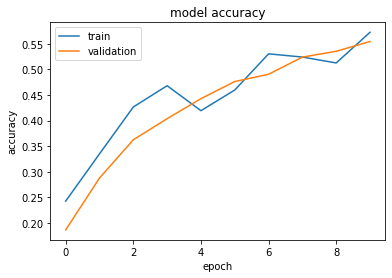

In [0]:
# summarize history for accuracy
plt.plot(Fitting_model_2.history['val_accuracy'])
plt.plot(Fitting_model_2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.datasets import cifar10
from keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model as models
from skimage.transform import resize
from IPython import embed

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images[0:2000]
train_labels = train_labels[0:2000]
test_images = test_images[0:2000]
test_labels = test_labels[0:2000]
####Cannot run the whole data through the process since it causes carsh so using only 2000 samples of the data.


In [0]:
NUM_CLASSES = 10
BATCH_SIZE = 64
NUM_EPOCHS = 15

In [0]:


train_labels = keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = keras.utils.to_categorical(test_labels, NUM_CLASSES)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

use_data_aug = True

def resize_image_arr(img_arr):
    x_resized_list = []
    for i in range(img_arr.shape[0]):
        img = img_arr[0]
        resized_img = resize(img, (224, 224))
        x_resized_list.append(resized_img)
    return np.stack(x_resized_list)

# Resize image arrays
train_images = resize_image_arr(train_images)
test_images = resize_image_arr(test_images)



In [0]:
resnet_model = ResNet50(include_top=False, weights='imagenet')

train_resnet = resnet_model.output
train_resnet = GlobalAveragePooling2D()(train_resnet)
train_resnet = Dense(512, activation='relu')(train_resnet)
predictions = Dense(NUM_CLASSES, activation='softmax')(train_resnet)

#Training the model:
model = models(inputs=resnet_model.input, outputs=predictions)

model.compile(loss='binary_crossentropy',
              optimizer= optimizers.RMSprop(lr=0,decay= 0),
              metrics=['accuracy'])

model.fit(train_images, train_labels,
              batch_size=BATCH_SIZE,
              epochs=NUM_EPOCHS,
              validation_data=(test_images, test_labels),
              shuffle=False)
datagen = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0,
        height_shift_range=0,
        horizontal_flip=True)

datagen.fit(train_images)


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Train on 2000 samples, validate on 2000 samples
Epoch 1/15
2000/2000 [==============================] - 37s 19ms/step - loss: 0.3436 - accuracy: 0.9000 - val_loss: 0.3326 - val_accuracy: 0.9000
Epoch 2/15
2000/2000 [==============================] - 26s 13ms/step - loss: 0.3436 - accuracy: 0.9000 - val_loss: 0.5217 - val_accuracy: 0.8198
Epoch 3/15
2000/2000 [==============================] - 26s 13ms/step - loss: 0.3436 - accuracy: 0.9000 - val_loss: 1.0440 - val_accuracy: 0.8198
Epoch 4/15
2000/2000 [==============================] - 26s 13ms/step - loss: 0.3436 - accuracy: 0.9000 - val_loss: 1.6213 - val_accuracy: 0.8198
Epoch 5/15
2000/2000 [==============================] - 26s 13ms/step - loss: 0.3436 - accuracy: 0.9000 - val_loss: 1.9467 - val_accuracy: 0.8203
Epoch 6/15
2000/2000 [==============================] - 26s 13ms/step - loss: 0.3436 - accuracy: 0.9000 - val_loss: 2.7561 - val_accuracy: 0.8203
Epoch 7/15
2000/2000 [==============================] - 26s 13ms/step - loss

In [0]:
#Fitting the model
model.fit_generator(datagen.flow(
    train_images, train_labels,
    batch_size=BATCH_SIZE),
    epochs=NUM_EPOCHS,
    validation_data=(test_images, test_labels))

Epoch 1/15
32/32 [==============================] - 26s 809ms/step - loss: 0.3514 - accuracy: 0.9000 - val_loss: 2.7561 - val_accuracy: 0.8203
Epoch 2/15
32/32 [==============================] - 26s 807ms/step - loss: 0.3520 - accuracy: 0.9000 - val_loss: 2.7561 - val_accuracy: 0.8203
Epoch 3/15
32/32 [==============================] - 26s 808ms/step - loss: 0.3504 - accuracy: 0.9000 - val_loss: 2.7561 - val_accuracy: 0.8203
Epoch 4/15
32/32 [==============================] - 26s 809ms/step - loss: 0.3500 - accuracy: 0.9000 - val_loss: 2.7561 - val_accuracy: 0.8203
Epoch 5/15
32/32 [==============================] - 26s 808ms/step - loss: 0.3509 - accuracy: 0.9000 - val_loss: 2.5198 - val_accuracy: 0.8203
Epoch 6/15
32/32 [==============================] - 26s 808ms/step - loss: 0.3502 - accuracy: 0.9000 - val_loss: 1.7507 - val_accuracy: 0.8203
Epoch 7/15
32/32 [==============================] - 26s 809ms/step - loss: 0.3523 - accuracy: 0.9000 - val_loss: 1.3798 - val_accuracy: 0.8203

In [0]:
Accuracy = model.evaluate(test_images, test_labels, 
                          batch_size= BATCH_SIZE, 
                          verbose=1)
print('\nTest result: %.3f loss: %.3f' % (Accuracy[1]*100, Accuracy[0]))

2000/2000 [==============================] - 7s 3ms/step

Test result: 81.980 loss: 1.556


### Task 2.2 Fast training of ResNet

*(weight ~10%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

In [0]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np


In [0]:
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 5:
        lrate = 0.0005
    if epoch > 10:
        lrate = 0.0003
    return lrate
 

In [0]:

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
#z-score
mean = np.mean(train_images,axis=(0,1,2,3))
std = np.std(train_images,axis=(0,1,2,3))
train_images = (train_images - mean)/(std+1e-7)
test_images = (test_images - mean)/(std+1e-7)

NUM_CLASSES = 10
BATCH_SIZE = 64
NUM_EPOCHS = 15

train_labels = keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = keras.utils.to_categorical(test_labels, NUM_CLASSES)
 

In [0]:

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape = train_images.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(NUM_CLASSES, activation='softmax'))
 
model.summary()
 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_346 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_101 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_347 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_102 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)       

In [0]:
#data augmentation using imagedatagenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_images)
train_datagen = datagen.flow(train_images, train_labels, 
                             batch_size = BATCH_SIZE)

model.compile(loss = 'categorical_crossentropy', 
              optimizer = keras.optimizers.rmsprop(lr=0.001,decay=1e-6), 
              metrics = ['accuracy'])

model.fit_generator(train_datagen,\
                    steps_per_epoch=train_images.shape[0] // BATCH_SIZE,
                    epochs=15,\
                    verbose=1,
                    validation_data=(test_images, test_labels),
                    callbacks=[LearningRateScheduler(lr_schedule)])


Epoch 1/15
781/781 [==============================] - 34s 43ms/step - loss: 1.9230 - accuracy: 0.4296 - val_loss: 1.4479 - val_accuracy: 0.5598
Epoch 2/15
781/781 [==============================] - 33s 42ms/step - loss: 1.3671 - accuracy: 0.5808 - val_loss: 1.1015 - val_accuracy: 0.6521
Epoch 3/15
781/781 [==============================] - 33s 42ms/step - loss: 1.1676 - accuracy: 0.6396 - val_loss: 1.5988 - val_accuracy: 0.6639
Epoch 4/15
781/781 [==============================] - 33s 42ms/step - loss: 1.0507 - accuracy: 0.6771 - val_loss: 0.9321 - val_accuracy: 0.7179
Epoch 5/15
781/781 [==============================] - 33s 42ms/step - loss: 0.9492 - accuracy: 0.7068 - val_loss: 0.8474 - val_accuracy: 0.7421
Epoch 6/15
781/781 [==============================] - 33s 43ms/step - loss: 0.8932 - accuracy: 0.7278 - val_loss: 0.7924 - val_accuracy: 0.7705
Epoch 7/15
781/781 [==============================] - 33s 42ms/step - loss: 0.7939 - accuracy: 0.7609 - val_loss: 0.7760 - val_accuracy:

In [0]:
#testing
scores = model.evaluate(test_images, test_labels, batch_size=64, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))


10000/10000 [==============================] - 1s 76us/step

Test result: 81.730 loss: 0.633


### Task 2.3 Performance comparison

*(weight ~3%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.



1. From the Task 2.1 with shallow Conv net we achieved an accuracy of 55% approximately.

2. From the Task 2.1.3 with Resnet we achieved an accuracy of 82% approximately.

3. From the Task 2.2 with fast trainin resnet we achieved an accuracy of 82% approximately.

Based on the results above we received about the same accuracy for both the methods but the 2.2 is better since the training time for the model is reduced by using the learning rate scheduler.



---
**END OF ASSIGNMENT TWO**